In [1]:
#import the cleaned dataset
import pandas as pd
df=pd.read_csv("Algerian_forest_fires_cleaned.csv")
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [3]:
# define target and training features
# target column is FWI(Fire Weather Index
X=df.drop('FWI',axis=1)
y=df['FWI']

In [4]:
X.shape, y.shape

((243, 11), (243,))

In [5]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [6]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [8]:
#correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


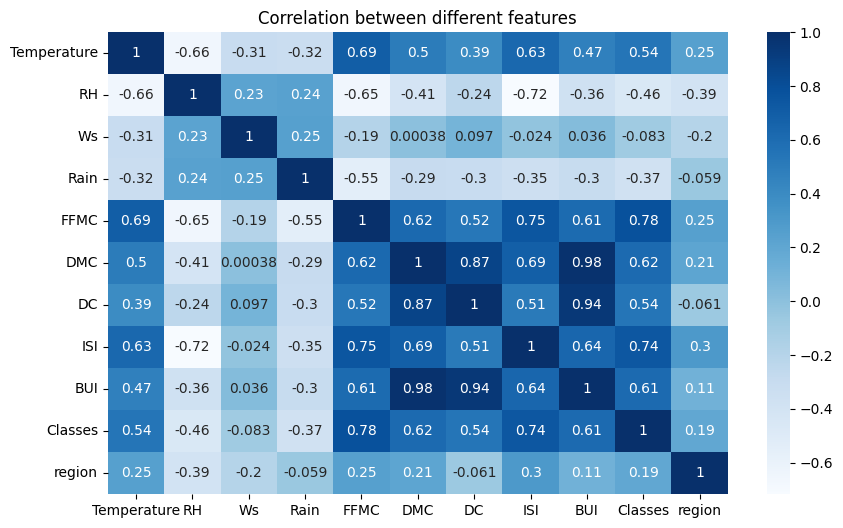

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
corr=X_train.corr()
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title("Correlation between different features")
plt.show()

In [10]:
# feature selection based on multicorrelation

def  correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
#drop highly correlated features from X_train based on threshold 0.85
corr_features = correlation(X_train, 0.85)

In [12]:
corr_features

{'BUI', 'DC'}

In [13]:
# drop the features when correlation is more than the threshold
X_train.drop(columns=corr_features, axis=1, inplace=True)
X_test.drop(columns=corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [14]:
#feature scaling and standarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [15]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

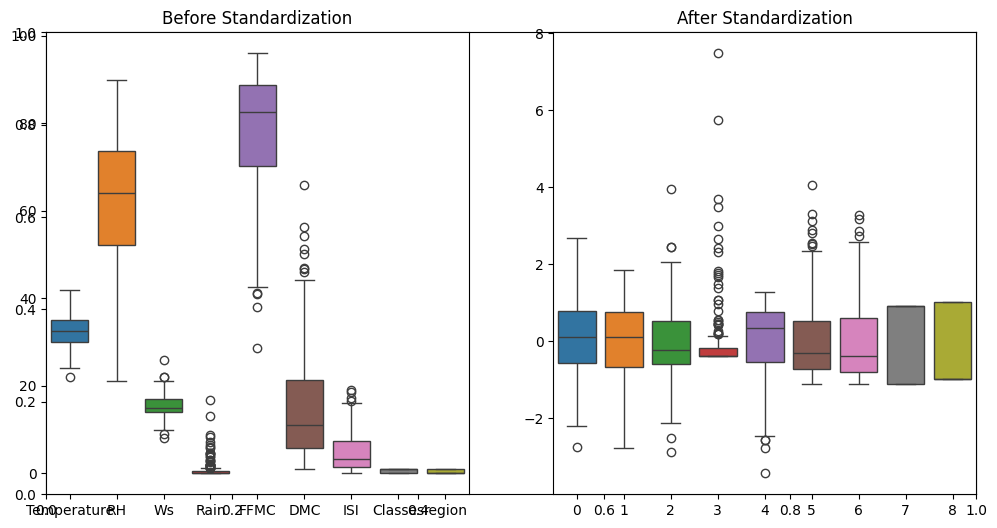

In [ ]:
# box plot for understand effect of standard scaler
plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before Standardization")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After Standardization")
plt.show()

In [16]:
# linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# predict on test data
y_test_pred=regressor.predict(X_test_scaled)

In [23]:
y_test_pred


array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [24]:
# evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
rmse=mse**0.5
r2=r2_score(y_test,y_test_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:",r2)

Mean Absolute Error: 0.5468236465249978
Mean Squared Error: 0.6742766873791592
Root Mean Squared Error: 0.8211435242265259
R2 Score: 0.9847657384266951


In [25]:
# apply lasso regression
from sklearn.linear_model import Lasso
lasso_regressor=Lasso()
lasso_regressor.fit(X_train_scaled,y_train) 
# predict on test data using lasso regression
y_test_pred_lasso=lasso_regressor.predict(X_test_scaled)
# evaluate lasso regression model
mae_lasso=mean_absolute_error(y_test,y_test_pred_lasso)
mse_lasso=mean_squared_error(y_test,y_test_pred_lasso)
rmse_lasso=mse_lasso**0.5
r2_lasso=r2_score(y_test,y_test_pred_lasso)
print("Lasso Regression Results:")
print("Mean Absolute Error:",mae_lasso)
print("Mean Squared Error:",mse_lasso)
print("Root Mean Squared Error:",rmse_lasso)
print("R2 Score:",r2_lasso)

Lasso Regression Results:
Mean Absolute Error: 1.133175994914409
Mean Squared Error: 2.2483458918974764
Root Mean Squared Error: 1.4994485292591662
R2 Score: 0.9492020263112388


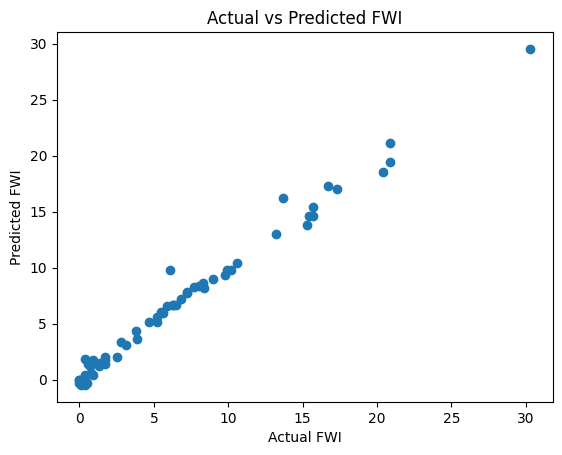

In [33]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI")
plt.show()

In [27]:
#cross validation lasso
from  sklearn.linear_model import LassoCV
lasso_cv_regressor=LassoCV(alphas=None,cv=5,max_iter=10000)
lasso_cv_regressor.fit(X_train_scaled,y_train)

c:\tareq\Data-science\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1641: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(


,eps,0.001
,n_alphas,'deprecated'
,alphas,None
,fit_intercept,True
,precompute,'auto'
,max_iter,10000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [28]:
lasso_cv_regressor.alpha_

np.float64(0.05725391318234408)

In [35]:
lasso_cv_regressor.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

Mean Absolute Error: 1.133175994914409
Mean Squared Error: 2.2483458918974764
Root Mean Squared Error: 1.4994485292591662
R2 Score: 0.9492020263112388


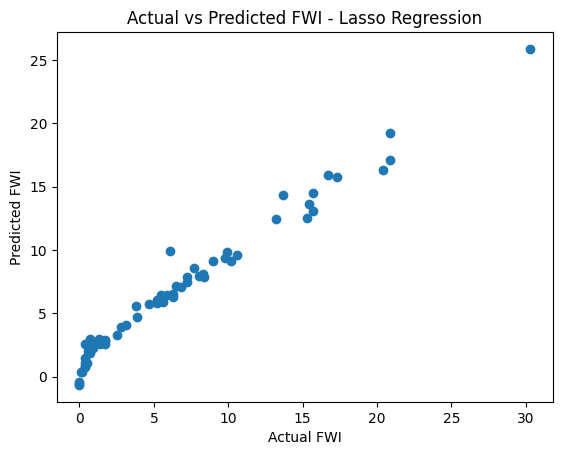

In [36]:
# evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test,y_test_pred_lasso)
mse=mean_squared_error(y_test,y_test_pred_lasso)
rmse=mse**0.5
r2=r2_score(y_test,y_test_pred_lasso)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:",r2)
plt.scatter(y_test,y_test_pred_lasso)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI - Lasso Regression")
plt.show()

In [37]:
# ridge regression
from sklearn.linear_model import Ridge
ridge_regressor=Ridge()
ridge_regressor.fit(X_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [39]:
ridge_regressor.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

Ridge Regression Results:
Mean Absolute Error: 0.5642305340105686
Mean Squared Error: 0.6949198918152052
Root Mean Squared Error: 0.8336185529456535
R2 Score: 0.9842993364555513


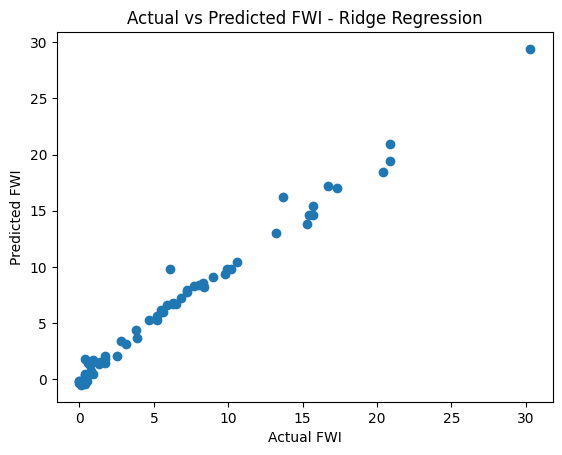

In [38]:
#predict on test data using ridge regression
y_test_pred_ridge=ridge_regressor.predict(X_test_scaled)    
# evaluate ridge regression model
mae_ridge=mean_absolute_error(y_test,y_test_pred_ridge)
mse_ridge=mean_squared_error(y_test,y_test_pred_ridge)
rmse_ridge=mse_ridge**0.5
r2_ridge=r2_score(y_test,y_test_pred_ridge)
print("Ridge Regression Results:")  
print("Mean Absolute Error:",mae_ridge)
print("Mean Squared Error:",mse_ridge)
print("Root Mean Squared Error:",rmse_ridge)
print("R2 Score:",r2_ridge)
plt.scatter(y_test,y_test_pred_ridge)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI - Ridge Regression")
plt.show()

In [40]:
# elastic net regression
from sklearn.linear_model import ElasticNet
elastic_net_regressor=ElasticNet()
elastic_net_regressor.fit(X_train_scaled,y_train)   


,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


Elastic Net Regression Results:
Mean Absolute Error: 1.8822353634896
Mean Squared Error: 5.517251101025224
Root Mean Squared Error: 2.3488829474933874
R2 Score: 0.8753460589519703


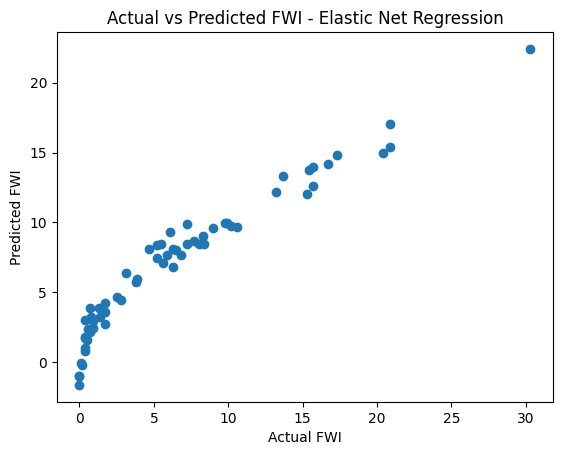

In [41]:
# predict on test data using elastic net regression
y_test_pred_enet=elastic_net_regressor.predict(X_test_scaled)    
# evaluate elastic net regression model
mae_enet=mean_absolute_error(y_test,y_test_pred_enet)
mse_enet=mean_squared_error(y_test,y_test_pred_enet)
rmse_enet=mse_enet**0.5
r2_enet=r2_score(y_test,y_test_pred_enet)
print("Elastic Net Regression Results:")
print("Mean Absolute Error:",mae_enet)
print("Mean Squared Error:",mse_enet)   
print("Root Mean Squared Error:",rmse_enet)
print("R2 Score:",r2_enet)
plt.scatter(y_test,y_test_pred_enet)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI") 
plt.title("Actual vs Predicted FWI - Elastic Net Regression")
plt.show()

### pickle the best machine learning model and preprocessing model

In [42]:
import pickle
# Save the trained model as a pickle string.
pickle.dump(ridge_regressor, open('ridge_regressor_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
